In [1]:
import numpy
import pandas
import os
import math
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
#os.chdir("xxxxxxxxxxxxxx/cifar-10-batches")
batch1 = pandas.read_pickle("data_batch_1")
batch2 = pandas.read_pickle("data_batch_2")
batch3 = pandas.read_pickle("data_batch_3")
batch4 = pandas.read_pickle("data_batch_4")
batch5 = pandas.read_pickle("data_batch_5")
batch6 = pandas.read_pickle("data_batch_6")

#data=data.to_numpy()


In [5]:

def pre_process(x,y):
  m=len(y)
  
  x = (x/255).astype('float32')
  x=x.T
  y = numpy.array(y).reshape(1,m)
  yn=numpy.zeros((10,m))
  
  for i in range(m):
    yn[y[0][i]][i]=1
  yn=yn.astype('float32')

  print(numpy.unique(y,return_counts=True))
  return x,yn


In [6]:
x1=batch1[b'data']
x2=batch2[b'data']
x3=batch3[b'data']
x4=batch4[b'data']
x5=batch5[b'data']
x=numpy.vstack((x1,x2,x3,x4,x5))
x6=batch6[b'data']


pre_y1 = batch1[b'labels']
pre_y2 = batch2[b'labels']
pre_y3 = batch3[b'labels']
pre_y4 = batch4[b'labels']
pre_y5 = batch5[b'labels']
pre_y = numpy.hstack((pre_y1,pre_y2,pre_y3,pre_y4,pre_y5)).reshape(-1,1)
pre_y6 = batch6[b'labels']


#x_pre_train,y_pre_train=pre_process(x1,pre_y1)
x,y = pre_process(x,pre_y)
x_test,y_test = pre_process(x6,pre_y6)


del x1,x2,x3,x4,x5,x6,pre_y1,pre_y2,pre_y3,pre_y4,pre_y5,pre_y6,batch1,batch2,batch3,batch4,batch5,batch6

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


(1024, 1)


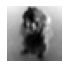

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]



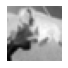

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]



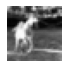

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]



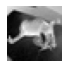

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]



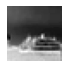

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]



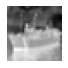

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]



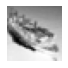

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]



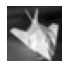

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



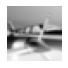

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



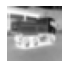

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]



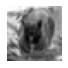

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]



In [7]:

f=x[0:1024,0:1]
#f=f.T
print(numpy.shape(f))
for i in range(11):
  ind=(int)(numpy.random.uniform(0,50000,None))


  pic=(x[0:1024,ind:ind+1]).reshape(32,32)
  pic=pic/255
  plt.imshow(pic, cmap = plt.cm.binary)
  figure = plt.gcf()
  figure.set_size_inches(1,1)
  plt.axis("off")
  plt.show()


  print(y[0:10,ind])
  print()


In [12]:
class model:
  def __init__(self):
    self.layers = []
    self.number_of_layers = 0
    self.weights = {}
    self.bias = {}
    self.activation = 'sigmoid'


  def layer(self,n):
    self.layers.append(n)
    self.number_of_layers += 1
    return

  def set_activation(self,f):
    self.activation = f
    return

  def initialize_weights(self):

    numpy.random.seed(7)
    l = self.number_of_layers

    for i in range(l-1):
      
      if self.activation == 'erelu' or self.activation == 'relu':
        w = numpy.random.randn( self.layers[i + 1], self.layers[i] ) * numpy.sqrt( 2 / self.layers[i] )
      else:
        wrange = numpy.sqrt( 6 / ( self.layers[i]+self.layers[i+1] ) )
        w = numpy.random.uniform( wrange, -wrange, ( self.layers[i + 1], self.layers[i] ) )

      b = numpy.zeros( ( self.layers[i + 1], 1) )
      self.bias[i] = b
      self.weights[i] = w
  
  def sigmoid(self,z):
    return 1/(1 + numpy.exp(-z))

  def erelu(self,z):
    #e = numpy.where( z > 0, z, 0.2 * ( math.exp(z) - 1 ) )
    e = ( (z > 0) * z) + ((z <= 0) * numpy.exp(z) * 0.2)
    return e

  def relu(self,z):
    r = ( (z > 0) * z) + ((z <= 0) * z * 0.001)
    return r


  def hypothesis(self,x):
    alist = []
    zlist = []
    alist.append(x)
    for i in range( self.number_of_layers - 2 ):
      z = numpy.dot( self.weights[i], x ) + self.bias[i]
      zlist.append(z)
      if self.activation == 'erelu':
        a = self.erelu(z)
      elif self.activation == 'relu':
        a = self.relu(z)
      else:
        a = self.sigmoid(z)
      alist.append(a)
      x = a
    z = numpy.dot( self.weights[self.number_of_layers - 2], x ) + self.bias[self.number_of_layers - 2]
    zlist.append(z)
    a = numpy.exp(z) / numpy.sum( numpy.exp(z), axis=0 )
    alist.append(a)
    h = a
    return h,alist,zlist


  def predict(self,x,y):
    h, temp, temp1 = self.hypothesis(x)
    cost=0
    m=numpy.shape(h)[1]

    for i in range(m):
      if numpy.argmax( h[:,i:i+1] ) != numpy.argmax( y[:,i:i+1] ):
        maxx = numpy.max(h[:,i:i+1])
        cost += 1
    return ((m-cost)/m)*100

  def test(self):
    print("EX")


In [13]:
class trainer:
  
  def __init__(self,model,alpha,mini_batch,print_frequency,show_plot):
    self.model = model
    self.alpha = alpha
    self.print_frequency = print_frequency
    self.show_plot = show_plot



  def Loss(self,h,y):
    lsum = numpy.sum( numpy.multiply( y, numpy.log(h) ) )
    return -lsum
    
    
  def back_propagation(self,alist,zlist,x,h,y):
    dwlist = {}
    dblist = {}
    num = self.model.number_of_layers-2
    m = numpy.shape(x)[1]


    dz = h - y
    dw = (1./ m) * ( numpy.dot ( dz, alist[num].T ) )
    db = (1./ m) * numpy.sum( dz, axis=1, keepdims = True)
    dwlist[num] = dw
    dblist[num] = db
    num -= 1
    

    for i in range(num,-1,-1):
      da = numpy.dot(self.model.weights[i+1].T, dz)
      if self.model.activation == 'erelu':
        z = zlist[i]
        de = ( (z > 0) * 1) + ((z <= 0) * alist[i+1] * 0.2)
        dz = da * de
      elif self.model.activation == 'relu':
        z = zlist[i]
        dr = ( (z > 0) * 1) + ((z <= 0) * 0.1)
        dz = da * de
      else:
        dz = da * alist[i+1] * (1-alist[i+1])
      dw=(1./m) * ( numpy.dot(dz, alist[i].T) )
      db=(1./m) * ( numpy.sum(dz, axis=1, keepdims = True) )
      dwlist[i] = dw
      dblist[i] = db

    return dwlist,dblist

  def mini_batch(self,x,y,batch_size):
    batches = [] 
    data = numpy.vstack((x,y))
    m = data.shape[1]
    numpy.random.seed(7)
    p = numpy.random.permutation(m)
    data = data[:,p]
    batch_count = (int)(data.shape[1]/batch_size)
    x_size = numpy.shape(x)[0]
    y_size = numpy.shape(y)[0]


    for i in range(batch_count): 
        mini_batch = data[:,i*batch_size:(i+1)*batch_size] 
        xm = mini_batch[0:x_size,:] 
        ym = mini_batch[x_size:x_size+y_size,:]#.reshape((-1,1))
        batches.append((xm,ym))
        
    return batches,batch_count


  def train_model(self,x,y,x_test,y_test,epoch,batch_size):
    loss_list = []
    test_loss_list = []
    for e in range(epoch):
      batches,batch_count = self.mini_batch(x,y,batch_size)
      loss = 0

      for b in batches:
        batch_x, batch_y = b
        h, alist, zlist = self.model.hypothesis(batch_x)
        dwlist, dblist = self.back_propagation(alist, zlist, batch_x, h, batch_y)


        loss += self.Loss(h, batch_y)


        for each in self.model.weights.keys():
          self.model.weights[each] -= self.alpha * dwlist[each]
          self.model.bias[each] -= self.alpha * dblist[each]
      

      h_test, aaa, xxx = self.model.hypothesis(x_test)
      test_loss = self.Loss(h_test,y_test)
      #loss*=batch_size/100000
      loss_list.append(loss/50000)
      test_loss_list.append(test_loss/10000)
         

      if e % self.print_frequency == 0:
        acc = self.model.predict(x_test,y_test)
        print("epoch: ",e," Loss: ",loss," Test Loss:",test_loss," Acc:",acc)
    
    if (self.show_plot==True):
      plt.plot(loss_list,label='train loss')
      plt.plot(test_loss_list,label='test loss')
      plt.ylabel('loss')
      plt.xlabel('iterations')
      plt.show()
    return self.model.weights


In [14]:
m=model()
m.layer(1024)
#m.layer(512)
m.layer(216)
#m.layer(108)
m.layer(64)
#m.layer(32)
m.layer(16)
m.layer(10)
m.set_activation('erelu')
m.initialize_weights()



epoch:  0  Loss:  110929.66466136862  Test Loss: 21010.189523837485  Acc: 23.669999999999998
epoch:  1  Loss:  103888.7606980389  Test Loss: 20266.068874096025  Acc: 26.790000000000003
epoch:  2  Loss:  100381.25363734929  Test Loss: 19809.51521220996  Acc: 28.67
epoch:  3  Loss:  98080.14960010322  Test Loss: 19494.451321397053  Acc: 29.720000000000002
epoch:  4  Loss:  95948.70187342422  Test Loss: 19146.56708285868  Acc: 31.680000000000003
epoch:  5  Loss:  94226.97501066007  Test Loss: 18960.015866464048  Acc: 32.22
epoch:  6  Loss:  92859.5471776239  Test Loss: 18782.38357843064  Acc: 32.97
epoch:  7  Loss:  91731.93542018531  Test Loss: 18426.67754972457  Acc: 34.089999999999996
epoch:  8  Loss:  90711.93341274247  Test Loss: 18209.131288083005  Acc: 34.870000000000005
epoch:  9  Loss:  89765.51923745828  Test Loss: 18233.76918315703  Acc: 34.42
epoch:  10  Loss:  88830.1425138567  Test Loss: 18127.163490532996  Acc: 34.63
epoch:  11  Loss:  88044.9878637923  Test Loss: 17815.364

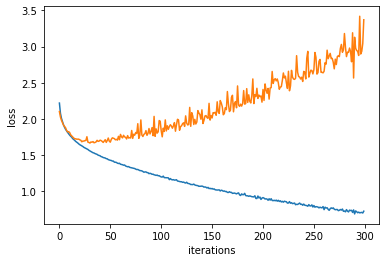

In [15]:
t=trainer(m,0.1,1,1,True)
w=t.train_model(x,y,x_test,y_test,300,256)

epoch:  0  Loss:  29099.204650406587  Test Loss: 28343.881876253294  Acc: 40.910000000000004
epoch:  1  Loss:  27487.989876830445  Test Loss: 28780.411890743344  Acc: 40.88
epoch:  2  Loss:  27032.45119042936  Test Loss: 29118.110603111247  Acc: 40.69
epoch:  3  Loss:  26655.22046901044  Test Loss: 29406.031878694437  Acc: 40.73
epoch:  4  Loss:  26368.17998369707  Test Loss: 29696.970205905905  Acc: 40.81
epoch:  5  Loss:  26063.33850892564  Test Loss: 29913.6572355678  Acc: 40.71
epoch:  6  Loss:  25855.91044101448  Test Loss: 30205.220871886577  Acc: 40.69
epoch:  7  Loss:  25622.727594401713  Test Loss: 30439.51433106964  Acc: 40.62
epoch:  8  Loss:  25435.037222919596  Test Loss: 30669.61736825221  Acc: 40.69
epoch:  9  Loss:  25253.68115044833  Test Loss: 30890.121593075335  Acc: 40.47
epoch:  10  Loss:  25042.944486613378  Test Loss: 31105.944305204222  Acc: 40.48
epoch:  11  Loss:  24851.879139242767  Test Loss: 31303.915918814662  Acc: 40.45
epoch:  12  Loss:  24717.3429289829

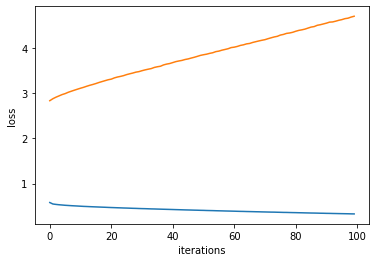

In [18]:
del w
t=trainer(m,0.01,1,1,True)
w=t.train_model(x,y,x_test,y_test,100,128)

In [19]:
print("test")
print("train acc: ",m.predict(x,y))
print("test acc: ",m.predict(x_test,y_test))


test
train acc:  79.084
test acc:  39.550000000000004


In [ ]:
pic=x[:,1:2].reshape(32,32)
plt.imshow(pic, cmap = plt.cm.binary)
figure = plt.gcf()
figure.set_size_inches(1,1)
plt.axis("off")
plt.show()

In [ ]:
print(numpy.shape(pic))
repic=[]
for j in range(0,32,2):
  plist=[]
  #print(j)
  for i in range(0,32,2):
    #maxx=max(pic[j][i],pic[j+1][i],pic[j][i+1],pic[i+1][j+1])
    maxx=(pic[j][i]+pic[j+1][i]+pic[j][i+1]+pic[i+1][j+1])/4
    plist.append(maxx)
  repic.append(plist)
print(repic)
repic=numpy.array(repic)
print(numpy.shape(repic))
plt.imshow(repic, cmap = plt.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
import cv2
repic = cv2.resize(pic, dsize=(16, 16), interpolation=cv2.INTER_CUBIC)
plt.imshow(repic, cmap = plt.cm.binary)
figure = plt.gcf()
figure.set_size_inches(0.3,0.3)
plt.axis("off")
plt.show()